In [37]:
# Import essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#  Load the data
train = pd.read_csv("Datasets/Music_dataset/train.csv")
train.head(6)

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5
5,6,Beck,Fuckin With My Head (Mountain Dew Rock),38.0,0.657,0.813,7.0,-7.861,1,0.2160,0.008340,0.0492,0.208,0.589,82.035,219587.0,4,10


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

Our data contain 17 columns, 12 of them are float, 4 are intger and 2 contain text data

In [40]:
train.isnull().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

<Axes: >

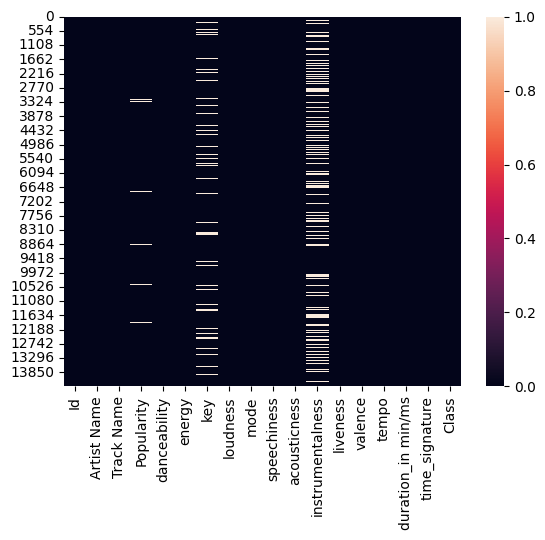

In [41]:
sns.heatmap(train.isnull())

Our data contain null values, the heatmap shows the distrbution of the null values in their columns.

In [42]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
train[['Popularity']] = imputer.fit_transform(train[['Popularity']])
train[['key']] = imputer.fit_transform(train[['key']])
train[['instrumentalness']] = imputer.fit_transform(train[['instrumentalness']])


In the above step we used the KNN imputer to fill the null values according to the other rows similar in other features

Due to the large number of nulls, other methods that delete the null's or fill them with the mean, mode, or median were been avoided.

In [43]:
train.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.216285,0.165517,0.235967,3.015874,4.057362,0.479944,0.085157,0.310922,0.264206,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,4.000000,-9.538000,0.000000,0.034800,0.004280,0.000295,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,5.953781,-7.013500,1.000000,0.047100,0.081450,0.053400,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,8.000000,-5.162000,1.000000,0.083100,0.432250,0.178129,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [44]:
train.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.000000,0.334,0.536,9.000000,-6.649,0,0.0381,0.378000,0.178129,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.000000,0.725,0.747,11.000000,-5.545,1,0.0876,0.027200,0.046800,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,44.525208,0.584,0.804,7.000000,-6.094,1,0.0619,0.000968,0.635000,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.000000,0.515,0.308,5.953781,-14.711,1,0.0312,0.907000,0.021300,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.000000,0.565,0.777,6.000000,-5.096,0,0.2490,0.183000,0.178129,0.211,0.619,88.311,254145.0,4,5


In [45]:
train["Class"].value_counts()

Class
10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: count, dtype: int64

<Axes: ylabel='count'>

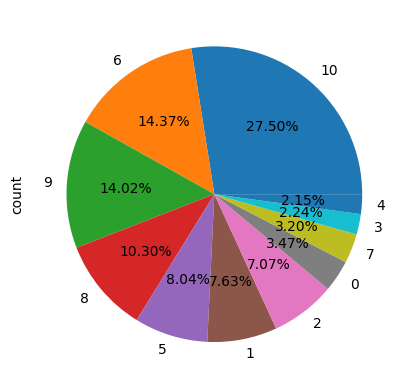

In [46]:

train.Class.value_counts().plot.pie(autopct = "%0.2f%%")

It seems that the track name or the artist name are not important for further analysis

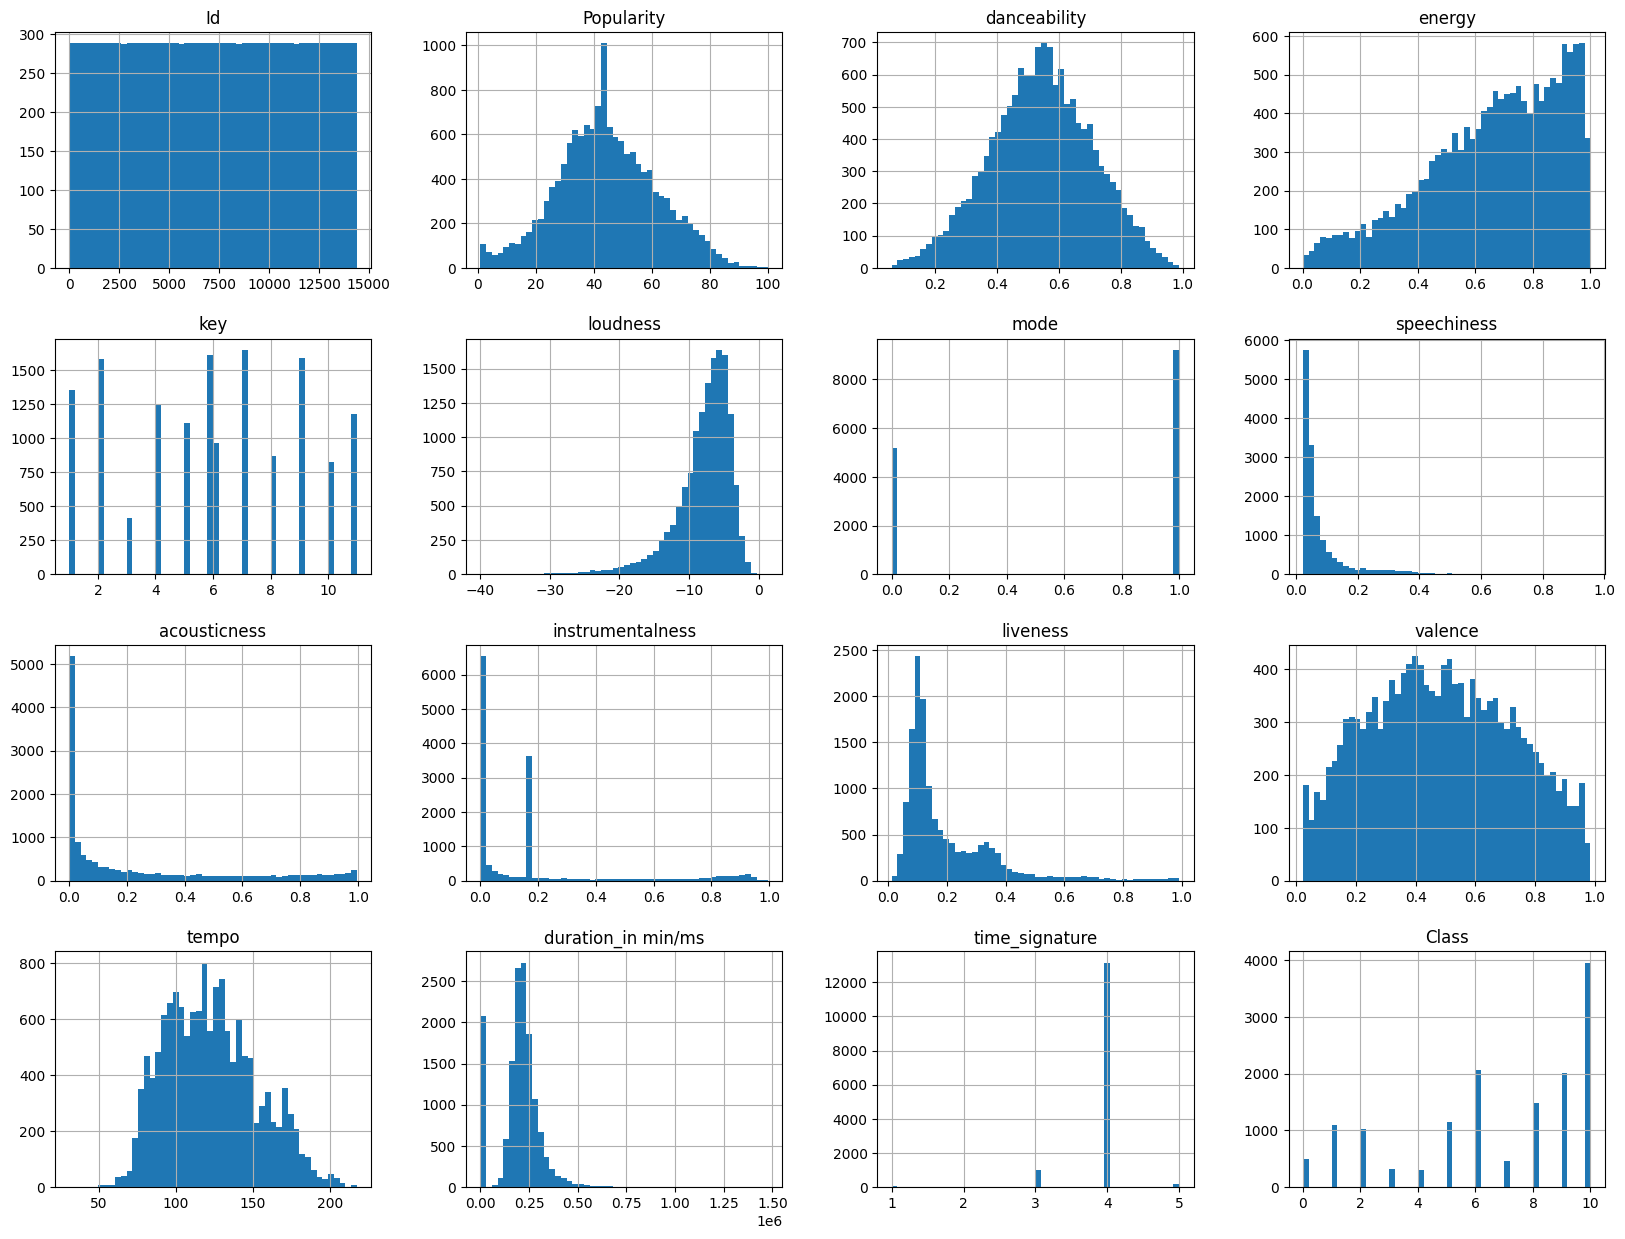

In [47]:
train.hist(figsize = (20,15),bins = 50)
plt.show()

In [48]:
# Create new features

# Tempo per second
train['tempo_per_ms'] = train['tempo'] / (train['duration_in min/ms'])

# Energy to Loudness Ratio
train['energy_loudness_ratio'] = train['energy'] / train['loudness']

# Loudness-Tempo Interaction
train['loudness_tempo_interaction'] = train['loudness'] * train['tempo']

# Loudness-danceability Interaction
train['Loudness-danceability Interaction'] = train['loudness'] * train['danceability']


In [49]:
train.drop(["Id"], axis = 1, inplace = True)

In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
categorical_columns = ["Artist Name", "Track Name"]
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    train[col] = label_encoders[col].fit_transform(train[col])


Lambda used for Yeo-Johnson transformation of loudness: 1.9760373078079168
Lambda used for Yeo-Johnson transformation of loudness_tempo_interaction: 1.2874924576180151
Lambda used for Yeo-Johnson transformation of Loudness-danceability Interaction: 1.917844914833084


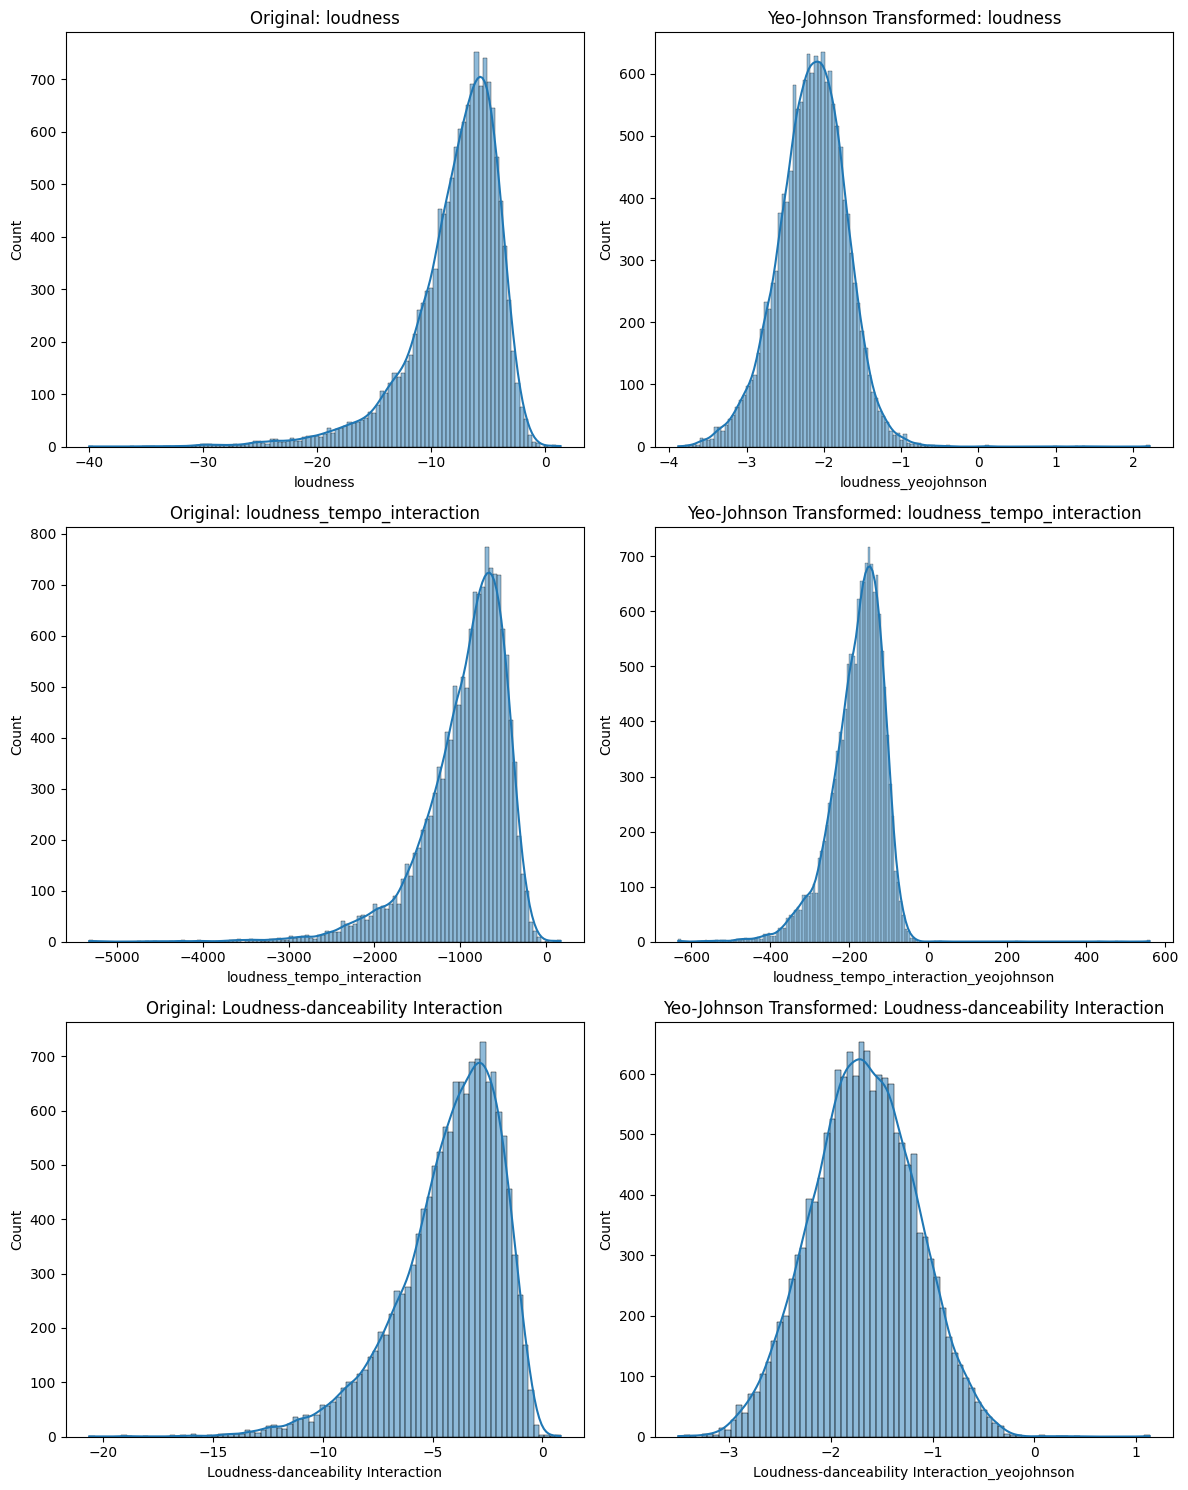

In [51]:
from scipy import stats

columns_to_transform = ['loudness', 'loudness_tempo_interaction', 'Loudness-danceability Interaction']

# Apply Yeo-Johnson transformation to each column
for col in columns_to_transform:
    transformed_col, lambda_ = stats.yeojohnson(train[col])
    train[f'{col}_yeojohnson'] = transformed_col
    print(f'Lambda used for Yeo-Johnson transformation of {col}: {lambda_}')

# Visualize the original and transformed distributions
fig, axes = plt.subplots(len(columns_to_transform), 2, figsize=(12, 5 * len(columns_to_transform)))

for i, col in enumerate(columns_to_transform):
    # Original distribution
    sns.histplot(train[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Original: {col}')

    # Transformed distribution
    sns.histplot(train[f'{col}_yeojohnson'], ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'Yeo-Johnson Transformed: {col}')

plt.tight_layout()
plt.show()


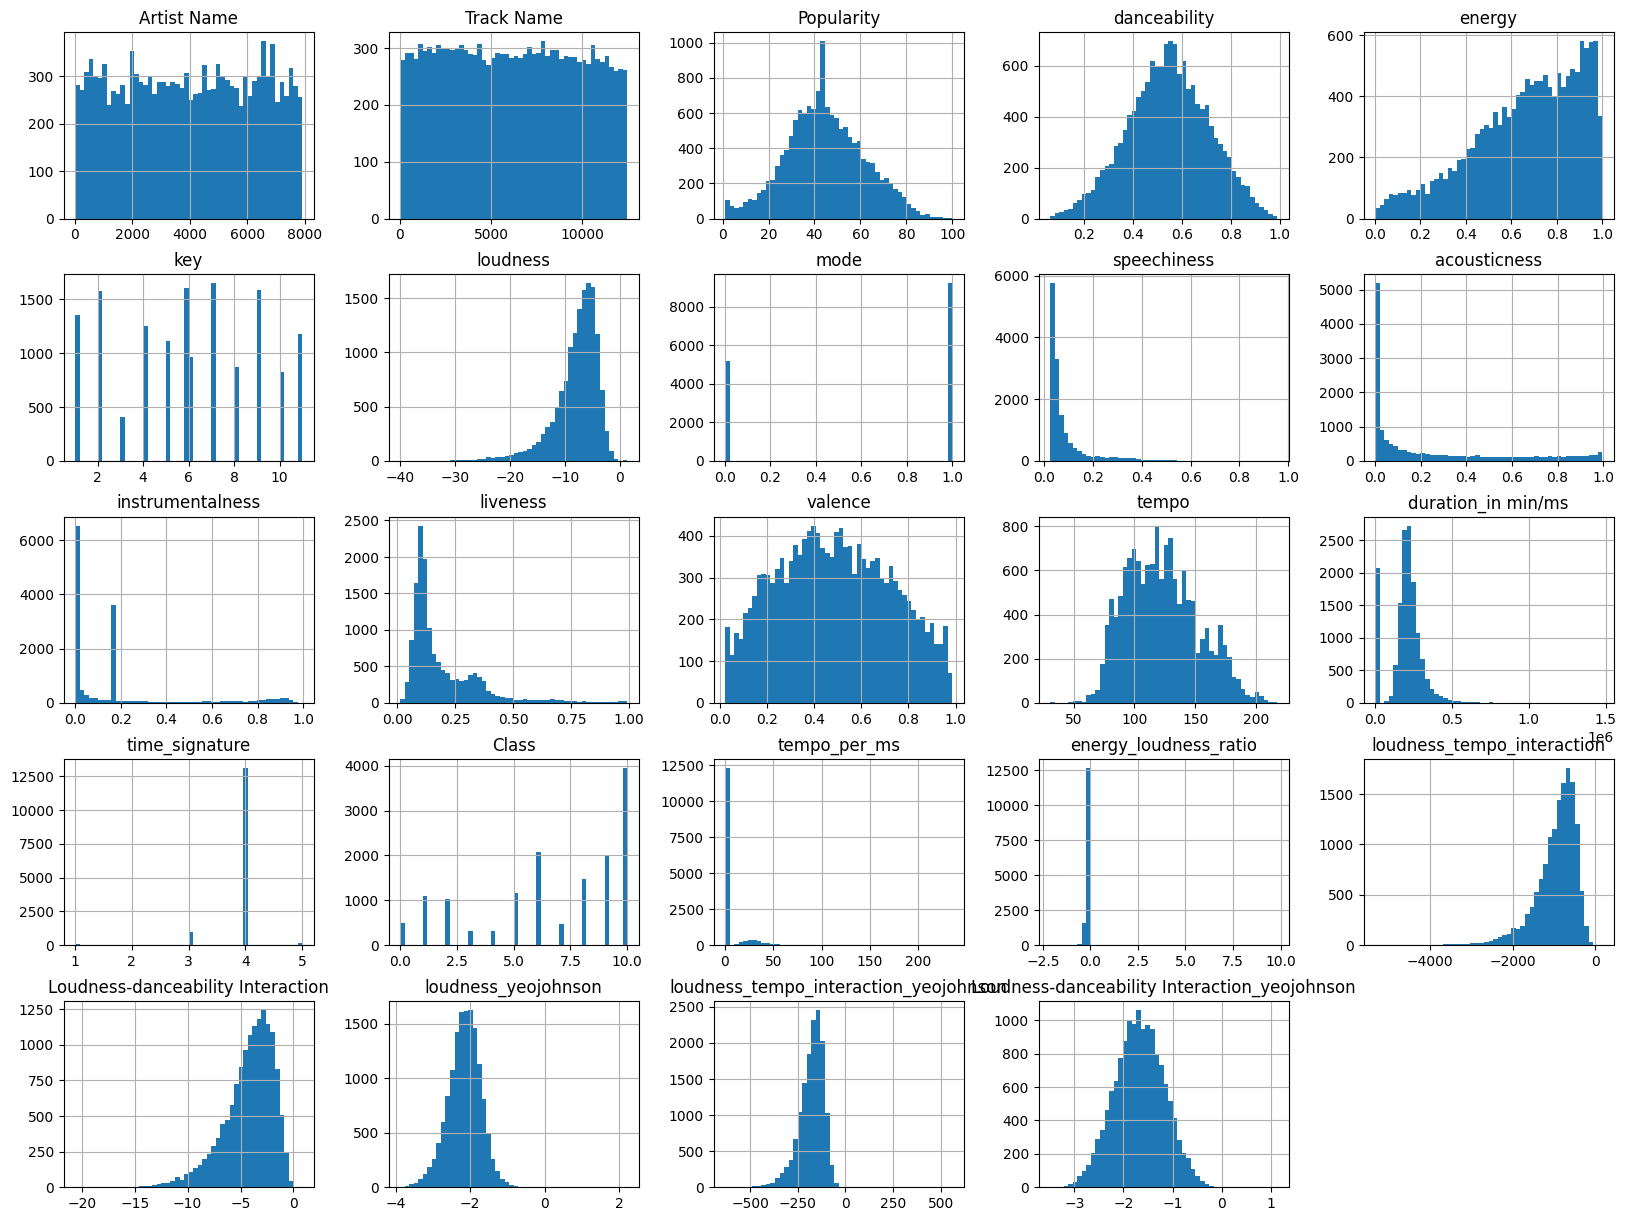

In [52]:
train.hist(figsize = (20,15),bins = 50)
plt.show()

We used Yeo-Johnson Transformation specifically due t its ability in dealing with both positive and negative data

In the first and third columns the lambda is close to 2, indicating that the data transformation was close to a square function, which led to less skewness and more normal distribution.

In the second column the lambda is close to 1, indicating that the data was adjusted moderately to correct skewness.

From the Last figure most of  our data seemed to be normal distributed

<Axes: >

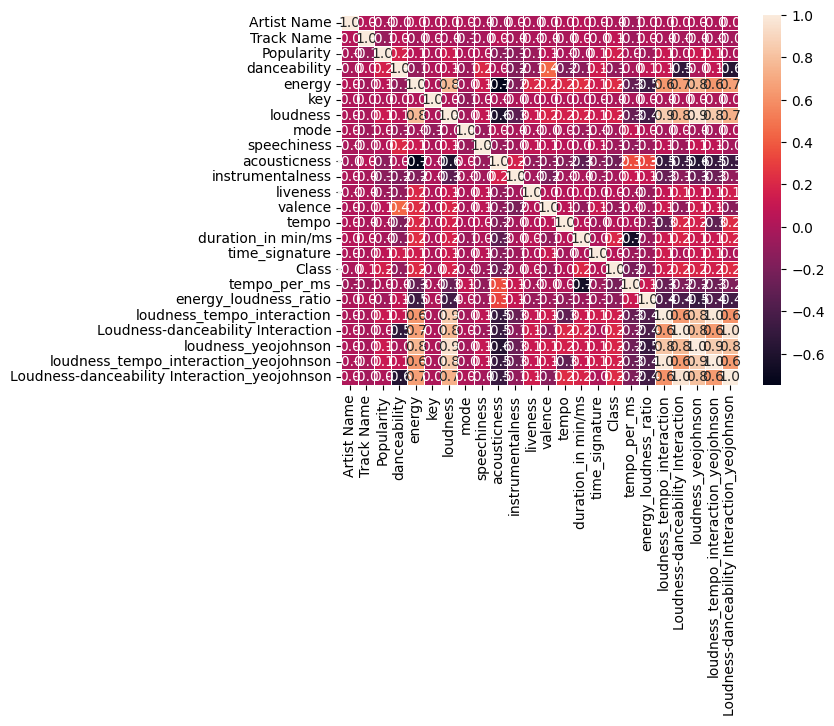

In [53]:
co = train.corr()
sns.heatmap(co, annot= True, fmt = ".1f", linewidth= 0.5)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.combine import SMOTEENN

In [55]:
train.isnull().sum()

Artist Name                                     0
Track Name                                      0
Popularity                                      0
danceability                                    0
energy                                          0
key                                             0
loudness                                        0
mode                                            0
speechiness                                     0
acousticness                                    0
instrumentalness                                0
liveness                                        0
valence                                         0
tempo                                           0
duration_in min/ms                              0
time_signature                                  0
Class                                           0
tempo_per_ms                                    0
energy_loudness_ratio                           0
loudness_tempo_interaction                      0


In [56]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target
X = train.drop('Class', axis=1)
y = train['Class']

# Calculate the target number of samples for each class
max_class_count = y.value_counts().max()
target_count = max_class_count * 2

# Define custom sampling strategies
smote_strategy = {cls: target_count for cls in y.unique()}
under_strategy = {cls: target_count for cls in y.unique()}

# Apply SMOTE to over-sample the minority classes
smote = SMOTE(sampling_strategy=smote_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Apply RandomUnderSampler to under-sample the majority classes
under_sampler = RandomUnderSampler(sampling_strategy=under_strategy, random_state=42)
X_resampled_final, y_resampled_final = under_sampler.fit_resample(X_resampled, y_resampled)

# Print the class distribution after resamplin
print("\nFinal class distribution after SMOTE and UnderSampling:\n", pd.Series(y_resampled_final).value_counts())



Final class distribution after SMOTE and UnderSampling:
 Class
0     7918
1     7918
2     7918
3     7918
4     7918
5     7918
6     7918
7     7918
8     7918
9     7918
10    7918
Name: count, dtype: int64


<Axes: ylabel='count'>

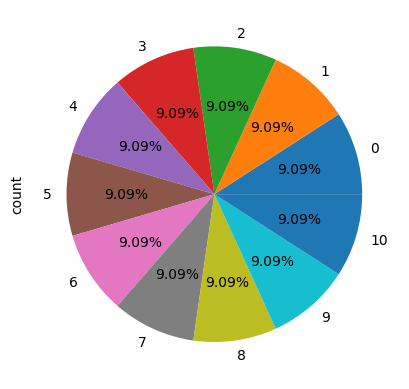

In [57]:
y_resampled_final.value_counts().plot.pie(autopct = "%0.2f%%")

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled_final)


In [63]:
x = X_scaled
y = y_resampled_final

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [65]:
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "SVC" : SVC(random_state=0),
    "RandomForest" : RandomForestClassifier(random_state=0),
    "LGBM" : LGBMClassifier(random_state=0, verbose= -1),
    "NaiveBayes": GaussianNB(),
    "DTC": DecisionTreeClassifier(),
    "GBC": GradientBoostingClassifier(),
    "XGBC": XGBClassifier(),
}


In [67]:
import time
valid_scores = pd.DataFrame({'classifier': classifiers.keys(), 'accuracy': np.zeros(len(classifiers)), 
                            'Precision': np.zeros(len(classifiers)), 'Recall': np.zeros(len(classifiers)),
                            'F1 Score':np.zeros(len(classifiers)),
                            'Training time (seconds)': np.zeros(len(classifiers))})

i = 0
for key, classifier in classifiers.items():
    start = time.time()
    clf = classifiers[key]

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    valid_scores.iloc[i, 1] = accuracy_score(y_test, y_pred)
    valid_scores.iloc[i, 2] = precision_score(y_test, y_pred, average='weighted')
    valid_scores.iloc[i, 3] = recall_score(y_test, y_pred, average='weighted')
    valid_scores.iloc[i, 4] = f1_score(y_test, y_pred, average='weighted')
    end = time.time()
    valid_scores.iloc[i, 5] = np.round((end - start), 2)

    i += 1

d:\Projects\ML projects\shAI assignments\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running the classification algorithms to find out the best performing mdoels to hyperparameter tune them for optimal accuracy.

In [68]:
valid_scores

,classifier,accuracy,Precision,Recall,F1 Score,Training time (seconds)
0,LogisticRegression,0.636567,0.618511,0.636567,0.623221,2.09
1,KNN,0.808094,0.805937,0.808094,0.796976,1.12
2,SVC,0.745695,0.734768,0.745695,0.737359,126.34
3,RandomForest,0.851894,0.846184,0.851894,0.847158,38.05
4,LGBM,0.804420,0.797470,0.804420,0.798741,3.44
5,NaiveBayes,0.545809,0.572225,0.545809,0.493451,0.11
6,DTC,0.751952,0.749747,0.751952,0.750549,3.40
7,GBC,0.714294,0.703959,0.714294,0.706897,639.28
8,XGBC,0.823708,0.818002,0.823708,0.819360,4.12


In [74]:
best_clf = {
    "KNN": KNeighborsClassifier(),
    "RF": RandomForestClassifier(),
    "LGBM": LGBMClassifier(verbose=-1),
    "XGBC": XGBClassifier()
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}

param_grid_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
}

param_grid_lgbm = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'n_estimators': [100, 200, 300],
}

param_grid_xgbc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
}

param_grids = {
    "KNN": param_grid_knn,
    "RF": param_grid_rf,
    "LGBM": param_grid_lgbm,
    "XGBC": param_grid_xgbc
}


Setup a param grid for each classifier

In [76]:
from sklearn.model_selection import GridSearchCV

best_params = best_clf.copy()   
i = 0
for key, classifier in best_clf.items():
    clf = GridSearchCV(classifier, param_grid=param_grids[key], cv= None, n_jobs=-1, scoring='accuracy')
    clf.fit(x_train, y_train)
    best_params[key] = clf.best_params_
    print(f'{key} is done.')

KNN is done.
RF is done.
LGBM is done.
XGBC is done.


In [77]:
best_params

{'KNN': {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'},
 'RF': {'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 500},
 'LGBM': {'max_depth': 20, 'n_estimators': 300, 'num_leaves': 50},
 'XGBC': {'max_depth': 9, 'n_estimators': 300}}

In [79]:
best_clf_with_params = {
    "KNN": KNeighborsClassifier(**best_params['KNN']),
    "RF": RandomForestClassifier(**best_params['RF']),
    "LGBM": LGBMClassifier(**best_params['LGBM'],verbose=-1),
    "XGBC": XGBClassifier(**best_params['XGBC'])
}

best_scores = pd.DataFrame({'classifier': best_clf_with_params.keys(), 'accuracy': np.zeros(len(best_clf_with_params)), 
                            'Precision': np.zeros(len(best_clf_with_params)), 'Recall': np.zeros(len(best_clf_with_params)),
                            'F1 Score':np.zeros(len(best_clf_with_params)),
                            'Training time (seconds)': np.zeros(len(best_clf_with_params))})

i = 0
for key, classifier in best_clf_with_params.items():
    start = time.time()
    clf = classifier

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    best_scores.iloc[i, 1] = accuracy_score(y_test, y_pred)
    best_scores.iloc[i, 2] = precision_score(y_test, y_pred, average='weighted')
    best_scores.iloc[i, 3] = recall_score(y_test, y_pred, average='weighted')
    best_scores.iloc[i, 4] = f1_score(y_test, y_pred, average='weighted')
    end = time.time()
    best_scores.iloc[i, 5] = np.round((end - start), 2)
    print(f'{key} is done.')

    i += 1

KNN is done.
RF is done.
LGBM is done.
XGBC is done.


Checking accuracy of the hyperparameter tuned models

In [80]:
best_scores

,classifier,accuracy,Precision,Recall,F1 Score,Training time (seconds)
0,KNN,0.862227,0.859452,0.862227,0.857965,1.24
1,RF,0.854420,0.848743,0.854420,0.849905,192.49
2,LGBM,0.872216,0.869225,0.872216,0.870047,9.43
3,XGBC,0.882147,0.879286,0.882147,0.879915,21.21


In [95]:
best_params_for_XGBC_LGBM = {
    'LGBM': {'max_depth': 20, 'n_estimators': 700, 'num_leaves': 70},
    'XGBC': {'max_depth': 9, 'n_estimators': 700}}  

In [96]:
best_clf_with_params_XGBC_LGBM = {
    "LGBM": LGBMClassifier(**best_params_for_XGBC_LGBM['LGBM'],verbose=-1),
    "XGBC": XGBClassifier(**best_params_for_XGBC_LGBM['XGBC'])
}

best_scores_XGBC_LGBM = pd.DataFrame({'classifier': best_clf_with_params_XGBC_LGBM.keys(), 'accuracy': np.zeros(len(best_clf_with_params_XGBC_LGBM)), 
                            'Precision': np.zeros(len(best_clf_with_params_XGBC_LGBM)), 'Recall': np.zeros(len(best_clf_with_params_XGBC_LGBM)),
                            'F1 Score':np.zeros(len(best_clf_with_params_XGBC_LGBM)),
                            'Training time (seconds)': np.zeros(len(best_clf_with_params_XGBC_LGBM))})

i = 0
for key, classifier in best_clf_with_params_XGBC_LGBM.items():
    start = time.time()
    clf = classifier

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    best_scores_XGBC_LGBM.iloc[i, 1] = accuracy_score(y_test, y_pred)
    best_scores_XGBC_LGBM.iloc[i, 2] = precision_score(y_test, y_pred, average='weighted')
    best_scores_XGBC_LGBM.iloc[i, 3] = recall_score(y_test, y_pred, average='weighted')
    best_scores_XGBC_LGBM.iloc[i, 4] = f1_score(y_test, y_pred, average='weighted')
    end = time.time()
    best_scores_XGBC_LGBM.iloc[i, 5] = np.round((end - start), 2)
    print(f'{key} is done.')

    i += 1

LGBM is done.
XGBC is done.


In [97]:
best_scores_XGBC_LGBM

,classifier,accuracy,Precision,Recall,F1 Score,Training time (seconds)
0,LGBM,0.885878,0.884254,0.885878,0.884376,24.45
1,XGBC,0.885132,0.882366,0.885132,0.883042,48.12


In [107]:
knn = KNeighborsClassifier(**best_params['KNN'])
rf = RandomForestClassifier(**best_params['RF'])
lgbm = LGBMClassifier(**best_params_for_XGBC_LGBM['LGBM'], verbose=-1)
xgbc = XGBClassifier(**best_params_for_XGBC_LGBM['XGBC'])

voting = VotingClassifier(estimators=[("KNN", knn), ("RF", rf), ("LGBM", lgbm), ("XGBC", xgbc),])
voting.fit(x_train, y_train)
voting.score(x_test, y_test)

0.8860505166475315

In [112]:
voting.fit(x, y)

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=3,
                                                   weights='distance')),
                             ('RF', RandomForestClassifier(n_estimators=500)),
                             ('LGBM',
                              LGBMClassifier(max_depth=20, n_estimators=700,
                                             num_leaves=70, verbose=-1)),
                             ('XGBC',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=9,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=700, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [113]:
test = pd.read_csv("Datasets/Music_dataset/test.csv")
sub = pd.read_csv("Datasets/Music_dataset/sub.csv")

In [114]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  3600 non-null   int64  
 1   Artist Name         3600 non-null   object 
 2   Track Name          3600 non-null   object 
 3   Popularity          3505 non-null   float64
 4   danceability        3600 non-null   float64
 5   energy              3600 non-null   float64
 6   key                 3195 non-null   float64
 7   loudness            3600 non-null   float64
 8   mode                3600 non-null   int64  
 9   speechiness         3600 non-null   float64
 10  acousticness        3600 non-null   float64
 11  instrumentalness    2764 non-null   float64
 12  liveness            3600 non-null   float64
 13  valence             3600 non-null   float64
 14  tempo               3600 non-null   float64
 15  duration_in min/ms  3600 non-null   float64
 16  time_s

In [115]:
test.isnull().sum()

Id                      0
Artist Name             0
Track Name              0
Popularity             95
danceability            0
energy                  0
key                   405
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      836
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

Applying same transformations on the test data to fit the features that the models were trained on.

In [117]:
imputer = IterativeImputer()
test.drop('Id', axis=1, inplace=True)
test[['Popularity']] = imputer.fit_transform(test[['Popularity']])
test[['key']] = imputer.fit_transform(test[['key']])
test[['instrumentalness']] = imputer.fit_transform(test[['instrumentalness']])

test['tempo_per_ms'] = test['tempo'] / (test['duration_in min/ms'])
test['energy_loudness_ratio'] = test['energy'] / test['loudness']
test['loudness_tempo_interaction'] = test['loudness'] * test['tempo']
test['Loudness-danceability Interaction'] = test['loudness'] * test['danceability']

categorical_columns = ["Artist Name", "Track Name"]
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    test[col] = label_encoders[col].fit_transform(test[col])

for col in columns_to_transform:
    transformed_col, lambda_ = stats.yeojohnson(test[col])
    test[f'{col}_yeojohnson'] = transformed_col

test = scaler.transform(test)

In [118]:
test.shape

(3600, 23)

In [127]:
pred = voting.predict(test)

In [128]:
sub['Class'] = pred

In [129]:
sub.to_csv('sub.csv', index=False)